# Load Data
Decided to just grab all the data in this one and manually manipulate it for binary features


In [38]:
import pybaseball as pb

pitch_data = pb.statcast("2025-01-01", "2025-9-30")
filename = f"statcast_all_cols_2025.csv"
pitch_data.to_csv(filename, index=False)
print(f"Data saved to {filename}")

KeyboardInterrupt: 

In [39]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('statcast_all_cols_2025.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:")
print(df.columns.tolist())

Dataset shape: (755179, 118)

Column names:
['pitch_type', 'game_date', 'release_speed', 'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher', 'events', 'description', 'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des', 'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y', 'tfs_deprecated', 'tfs_zulu_deprecated', 'umpire', 'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk', 'fielder_2', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y', 'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 'woba_value', 'woba_denom',

# Filter Columns Function
Create a function to keep only the relevant columns

In [40]:
def add_pitch_type_one_hot(dataframe, pitch_type_column='pitch_type'):
    """
    Add one-hot encoded columns for each unique pitch type.
    
    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        pitch_type_column (str): Name of the column containing pitch types. Default is 'pitch_type'.
    
    Returns:
        pd.DataFrame: A new DataFrame with one-hot encoded pitch type columns added.
    """
    df_with_features = dataframe.copy()
    
    # Get unique pitch types (excluding NaN values)
    unique_pitch_types = df_with_features[pitch_type_column].dropna().unique()
    print(f"Found {len(unique_pitch_types)} unique pitch types: {sorted(unique_pitch_types)}")
    
    # Create one-hot encoded columns for each pitch type
    for pitch_type in unique_pitch_types:
        column_name = f"pitch_type_{pitch_type}"
        df_with_features[column_name] = (df_with_features[pitch_type_column] == pitch_type).astype(int)
    
    print(f"Added {len(unique_pitch_types)} one-hot encoded columns for pitch types")
    
    return df_with_features

In [41]:
def add_count_one_hot(dataframe, balls_column='balls', strikes_column='strikes'):
    """
    Add one-hot encoded columns for each unique ball-strike count.
    
    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        balls_column (str): Name of the column containing ball counts. Default is 'balls'.
        strikes_column (str): Name of the column containing strike counts. Default is 'strikes'.
    
    Returns:
        pd.DataFrame: A new DataFrame with one-hot encoded count columns added.
    """
    df_with_features = dataframe.copy()
    
    
    # Create a combined count column (e.g., "0-0", "1-2", "3-2")
    df_with_features['count'] = df_with_features[balls_column].astype(str) + '-' + df_with_features[strikes_column].astype(str)
    
    # Get unique counts (excluding NaN values)
    unique_counts = df_with_features['count'].dropna().unique()
    print(f"Found {len(unique_counts)} unique counts: {sorted(unique_counts)}")
    
    # Create one-hot encoded columns for each count
    for count in unique_counts:
        column_name = f"count_{count}"
        df_with_features[column_name] = (df_with_features['count'] == count).astype(int)
    
    print(f"Added {len(unique_counts)} one-hot encoded columns for counts")
    
    # Drop the temporary 'count' column
    df_with_features = df_with_features.drop('count', axis=1)
    
    return df_with_features

In [42]:
def add_handedness_one_hot(dataframe, batter_column='stand', pitcher_column='p_throws'):
    """
    Add one-hot encoded columns for batter and pitcher handedness.
    
    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        batter_column (str): Name of the column containing batter handedness. Default is 'stand'.
        pitcher_column (str): Name of the column containing pitcher handedness. Default is 'p_throws'.
    
    Returns:
        pd.DataFrame: A new DataFrame with one-hot encoded handedness columns added.
    """
    df_with_features = dataframe.copy()
    
    # Create one-hot encoded columns for batter handedness
    df_with_features['batter_hand_L'] = (df_with_features[batter_column] == 'L').astype(int)
    df_with_features['batter_hand_R'] = (df_with_features[batter_column] == 'R').astype(int)
    print(f"Added one-hot encoded columns for batter handedness: batter_hand_L, batter_hand_R")


    # Create one-hot encoded columns for pitcher handedness
    df_with_features['pitcher_hand_L'] = (df_with_features[pitcher_column] == 'L').astype(int)
    df_with_features['pitcher_hand_R'] = (df_with_features[pitcher_column] == 'R').astype(int)
    print(f"Added one-hot encoded columns for pitcher handedness: pitcher_hand_L, pitcher_hand_R")
    
    return df_with_features


# Apply all feature engineering functions
df_with_features = add_pitch_type_one_hot(df)
df_with_features = add_count_one_hot(df_with_features)
df_with_features = add_handedness_one_hot(df_with_features)

# Display the new columns
print("\nPitch type columns:")
pitch_type_columns = [col for col in df_with_features.columns if col.startswith('pitch_type_')]
print(pitch_type_columns)

print("\nCount columns:")
count_columns = [col for col in df_with_features.columns if col.startswith('count_')]
print(count_columns)

print("\nHandedness columns:")
handedness_columns = [col for col in df_with_features.columns if 'hand' in col.lower()]
print(handedness_columns)

# Show a sample of the data with the new features
print("\nSample data with one-hot encoded features:")
display_cols = ['player_name', 'pitch_type', 'stand', 'p_throws'] + pitch_type_columns[:2] + count_columns[:2] + handedness_columns
df_with_features[display_cols].head(10)

Found 17 unique pitch types: ['CH', 'CS', 'CU', 'EP', 'FA', 'FC', 'FF', 'FO', 'FS', 'KC', 'KN', 'PO', 'SC', 'SI', 'SL', 'ST', 'SV']
Added 17 one-hot encoded columns for pitch types
Added 17 one-hot encoded columns for pitch types
Found 16 unique counts: ['0-0', '0-1', '0-2', '0-3', '1-0', '1-1', '1-2', '1-3', '2-0', '2-1', '2-2', '3-0', '3-1', '3-2', '4-2', '4-3']
Found 16 unique counts: ['0-0', '0-1', '0-2', '0-3', '1-0', '1-1', '1-2', '1-3', '2-0', '2-1', '2-2', '3-0', '3-1', '3-2', '4-2', '4-3']
Added 16 one-hot encoded columns for counts
Added 16 one-hot encoded columns for counts
Added one-hot encoded columns for batter handedness: batter_hand_L, batter_hand_R
Added one-hot encoded columns for pitcher handedness: pitcher_hand_L, pitcher_hand_R

Pitch type columns:
['pitch_type_FF', 'pitch_type_SL', 'pitch_type_FS', 'pitch_type_SI', 'pitch_type_CU', 'pitch_type_ST', 'pitch_type_FC', 'pitch_type_CH', 'pitch_type_KC', 'pitch_type_SV', 'pitch_type_KN', 'pitch_type_PO', 'pitch_type_FA'

,player_name,pitch_type,stand,p_throws,pitch_type_FF,pitch_type_SL,count_2-2,count_2-1,batter_hand_L,batter_hand_R,pitcher_hand_L,pitcher_hand_R
0,"Chapman, Aroldis",FF,L,L,1,0,1,0,1,0,1,0
1,"Chapman, Aroldis",SL,L,L,0,1,0,1,1,0,1,0
2,"Chapman, Aroldis",FF,L,L,1,0,0,0,1,0,1,0
3,"Chapman, Aroldis",FF,L,L,1,0,0,0,1,0,1,0
4,"Chapman, Aroldis",FF,L,L,1,0,0,0,1,0,1,0
5,"Chapman, Aroldis",SL,L,L,0,1,0,0,1,0,1,0
6,"Chapman, Aroldis",FF,L,L,1,0,0,0,1,0,1,0
7,"Chapman, Aroldis",FF,L,L,1,0,0,0,1,0,1,0
8,"Chapman, Aroldis",FF,L,L,1,0,0,0,1,0,1,0
9,"Chapman, Aroldis",FS,R,L,0,0,0,0,0,1,1,0


# Feature Engineering
Add one-hot encoded features for pitch types

In [ ]:
def filter_columns(dataframe, columns_to_keep, min_pitch_count=None, pitcher_column='player_name'):
    """
    Filter a DataFrame to keep only the specified columns and optionally filter by minimum pitch count.
    
    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        columns_to_keep (list): List of column names to keep.
        min_pitch_count (int, optional): Minimum number of pitches a pitcher must have thrown to be included.
        pitcher_column (str): Name of the column containing pitcher names. Default is 'player_name'.
    
    Returns:
        pd.DataFrame: A new DataFrame with only the specified columns and filtered by pitch count.
    """
    # Check which columns exist in the dataframe
    available_columns = [col for col in columns_to_keep if col in dataframe.columns]
    missing_columns = [col for col in columns_to_keep if col not in dataframe.columns]
    
    if missing_columns:
        print(f"Warning: The following columns were not found: {missing_columns}")
    
    # Filter by columns first
    df_filtered = dataframe[available_columns].copy()
    
    # Apply minimum pitch count filter if specified
    if min_pitch_count is not None and pitcher_column in df_filtered.columns:
        pitch_counts = df_filtered[pitcher_column].value_counts()
        pitchers_to_keep = pitch_counts[pitch_counts >= min_pitch_count].index
        
        original_count = len(df_filtered)
        df_filtered = df_filtered[df_filtered[pitcher_column].isin(pitchers_to_keep)]
        
        print(f"Filtered out {len(pitch_counts) - len(pitchers_to_keep)} pitchers with fewer than {min_pitch_count} pitches")
        print(f"Removed {original_count - len(df_filtered)} rows")
        print(f"Remaining pitchers: {len(pitchers_to_keep)}")
    
    return df_filtered


# Change this based on what we're doing
columns_to_keep = [
    'player_name',
    'release_speed',
    'release_pos_x',
    'release_pos_z',
    'pfx_x',
    'pfx_z',
    'plate_x',
    'plate_z',
    'vx0',
    'vy0',
    'vz0',
    'ax',
    'ay',
    'az',
    'release_spin',
    'spin_axis',
]

# Add all one-hot encoded pitch type columns to the list
pitch_type_one_hot_cols = [col for col in df_with_features.columns if col.startswith('pitch_type_')]
columns_to_keep.extend(pitch_type_one_hot_cols)

# Add all one-hot encoded count columns to the list
count_one_hot_cols = [col for col in df_with_features.columns if col.startswith('count_')]
columns_to_keep.extend(count_one_hot_cols)

# Add all one-hot encoded handedness columns to the list
handedness_cols = [col for col in df_with_features.columns if 'hand' in col.lower()]
columns_to_keep.extend(handedness_cols)

# Apply the filter function with minimum pitch count
df_filtered = filter_columns(df_with_features, columns_to_keep, min_pitch_count=2000)

print(f"\nFiltered dataset shape: {df_filtered.shape}")
print(f"\nFiltered columns:")
print(df_filtered.columns.tolist())
df_filtered.head()

Filtered out 1091 pitchers with fewer than 2000 pitches
Removed 461994 rows
Remaining pitchers: 110

Filtered dataset shape: (293185, 52)

Filtered columns:
['player_name', 'release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'spin_axis', 'pitch_type_FF', 'pitch_type_SL', 'pitch_type_FS', 'pitch_type_SI', 'pitch_type_CU', 'pitch_type_ST', 'pitch_type_FC', 'pitch_type_CH', 'pitch_type_KC', 'pitch_type_SV', 'pitch_type_KN', 'pitch_type_PO', 'pitch_type_FA', 'pitch_type_EP', 'pitch_type_CS', 'pitch_type_SC', 'pitch_type_FO', 'count_2-2', 'count_2-1', 'count_1-1', 'count_1-0', 'count_0-0', 'count_0-2', 'count_0-1', 'count_1-2', 'count_3-2', 'count_3-0', 'count_2-0', 'count_3-1', 'count_4-2', 'count_4-3', 'count_0-3', 'count_1-3', 'batter_hand_L', 'batter_hand_R', 'pitcher_hand_L', 'pitcher_hand_R']
Filtered out 1091 pitchers with fewer than 2000 pitches
Removed 461994 rows
Remaining pitchers: 110

Filtered dataset

,player_name,release_speed,release_pos_x,release_pos_z,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,...,count_2-0,count_3-1,count_4-2,count_4-3,count_0-3,count_1-3,batter_hand_L,batter_hand_R,pitcher_hand_L,pitcher_hand_R
43,"Crochet, Garrett",100.2,2.41,5.92,1.26,0.85,0.47,1.84,-8.498561,-145.455655,...,0,0,0,0,0,0,1,0,1,0
44,"Crochet, Garrett",97.3,2.49,6.10,0.58,1.21,1.69,4.42,-3.538441,-141.573377,...,0,0,0,0,0,0,1,0,1,0
45,"Crochet, Garrett",98.6,2.20,6.06,0.97,0.82,-0.79,2.64,-10.583974,-143.139599,...,0,0,0,0,0,0,1,0,1,0
46,"Crochet, Garrett",85.3,1.98,6.29,-1.21,-0.29,-0.47,2.72,-3.378757,-124.239066,...,0,0,0,0,0,0,1,0,1,0
47,"Crochet, Garrett",98.0,2.14,6.12,0.41,1.21,-0.65,4.39,-8.620733,-142.533048,...,0,0,0,0,0,0,1,0,1,0


In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F


# set up MLP for pitcher classification
class PitcherClassifier(nn.Module):
    """A simple feedforward neural network for pitcher classification.
    2 layers with ReLU activations and dropout for regularization.
    Args:
        num_features (int): Number of input features.
        num_pitchers (int): Number of unique pitchers (output classes).
        hidden1 (int): Number of neurons in the first hidden layer.
        hidden2 (int): Number of neurons in the second hidden layer.
        dropout_rate (float): Dropout rate for regularization.
    """
    def __init__(self, num_features, num_pitchers, hidden1=128, hidden2=64, dropout_rate=0.3):
        super().__init__()
        self.fc1 = nn.Linear(num_features, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.dropout = nn.Dropout(dropout_rate)
        self.out = nn.Linear(hidden2, num_pitchers)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        return self.out(x)
    

Here we train the MLP. Current accuracy is like .83 with 50 epochs. Haven't evaluated it on other metrics yet.

In [44]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Prepare the data
df_filtered = df_filtered.dropna()

# Encode pitcher names as labels
le = LabelEncoder()
y = le.fit_transform(df_filtered['player_name'])

# Drop the player_name column to get features only
X = df_filtered.drop(columns=['player_name'])

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)

# Create datasets and dataloaders
train_ds = TensorDataset(X_train, y_train)
val_ds   = TensorDataset(X_val, y_val)

train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
val_dl   = DataLoader(val_ds, batch_size=64, shuffle=False)

# Initialize model, optimizer, and loss function
model = PitcherClassifier(num_features=X_train.shape[1], num_pitchers=len(le.classes_))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

# Lists to track metrics
train_losses = []
val_losses = []
val_accuracies = []

# Training loop
for epoch in range(50):
    # Training
    model.train()
    epoch_train_loss = 0.0
    for X_batch, y_batch in train_dl:
        optimizer.zero_grad()
        logits = model(X_batch)
        loss = loss_fn(logits, y_batch)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    
    # Calculate average training loss for this epoch
    avg_train_loss = epoch_train_loss / len(train_dl)
    train_losses.append(avg_train_loss)
    
    # Validation
    model.eval()
    epoch_val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for X_batch, y_batch in val_dl:
            logits = model(X_batch)
            loss = loss_fn(logits, y_batch)
            epoch_val_loss += loss.item()
            
            preds = logits.argmax(dim=1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)
    
    # Calculate average validation loss and accuracy
    avg_val_loss = epoch_val_loss / len(val_dl)
    val_acc = correct / total
    
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)
    
    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}, Val Acc = {val_acc:.4f}")

print(f"\nFinal validation accuracy: {val_accuracies[-1]:.4f}")


Epoch 1: Train Loss = 1.8436, Val Loss = 1.0150, Val Acc = 0.6881
Epoch 2: Train Loss = 1.1619, Val Loss = 0.8502, Val Acc = 0.7313
Epoch 2: Train Loss = 1.1619, Val Loss = 0.8502, Val Acc = 0.7313
Epoch 3: Train Loss = 1.0427, Val Loss = 0.7649, Val Acc = 0.7559
Epoch 3: Train Loss = 1.0427, Val Loss = 0.7649, Val Acc = 0.7559
Epoch 4: Train Loss = 0.9769, Val Loss = 0.7033, Val Acc = 0.7741
Epoch 4: Train Loss = 0.9769, Val Loss = 0.7033, Val Acc = 0.7741
Epoch 5: Train Loss = 0.9276, Val Loss = 0.6854, Val Acc = 0.7791
Epoch 5: Train Loss = 0.9276, Val Loss = 0.6854, Val Acc = 0.7791
Epoch 6: Train Loss = 0.8970, Val Loss = 0.6620, Val Acc = 0.7870
Epoch 6: Train Loss = 0.8970, Val Loss = 0.6620, Val Acc = 0.7870
Epoch 7: Train Loss = 0.8723, Val Loss = 0.6352, Val Acc = 0.7950
Epoch 7: Train Loss = 0.8723, Val Loss = 0.6352, Val Acc = 0.7950
Epoch 8: Train Loss = 0.8513, Val Loss = 0.6207, Val Acc = 0.8002
Epoch 8: Train Loss = 0.8513, Val Loss = 0.6207, Val Acc = 0.8002
Epoch 9: T

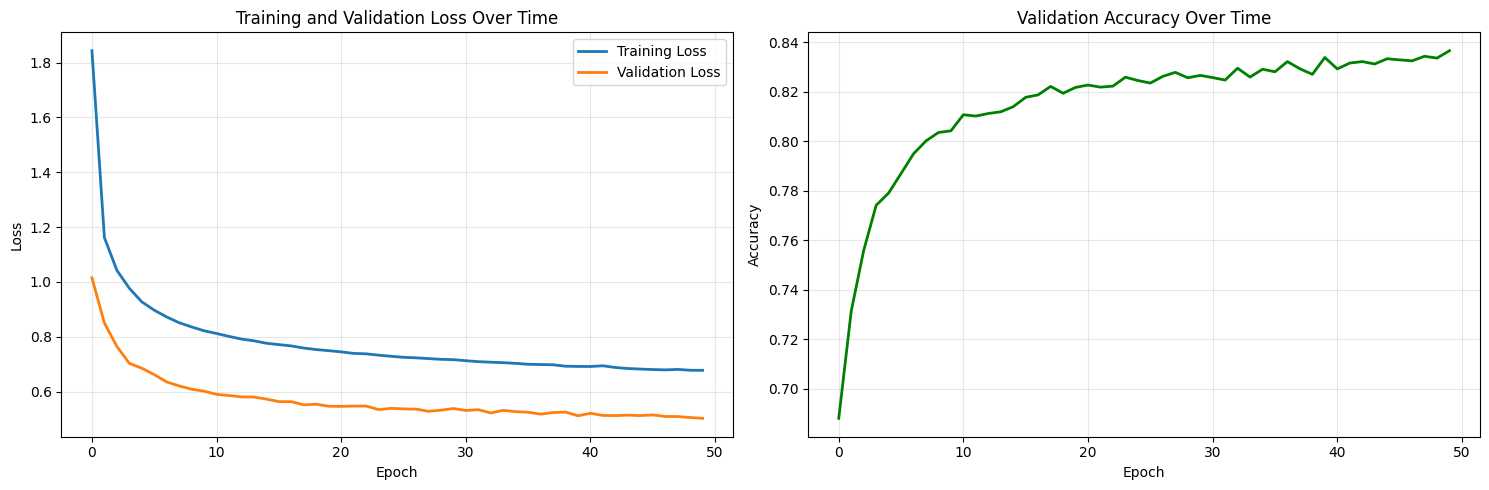

Top-1 Accuracy (Exact Match): 0.8366
Top-3 Accuracy: 0.9633
Top-5 Accuracy: 0.9852

Per-pitcher performance (sample):
  Abbott, Andrew: 0.848 accuracy (554 pitches)
  Alcantara, Sandy: 0.898 accuracy (578 pitches)
  Allen, Logan: 0.939 accuracy (527 pitches)
  Anderson, Tyler: 0.932 accuracy (468 pitches)
  Bassitt, Chris: 0.792 accuracy (600 pitches)
  Baz, Shane: 0.754 accuracy (540 pitches)
  Bello, Brayan: 0.869 accuracy (528 pitches)
  Berríos, José: 0.765 accuracy (548 pitches)
  Bibee, Tanner: 0.798 accuracy (623 pitches)
  Boyd, Matthew: 0.909 accuracy (561 pitches)
  Bradley, Taj: 0.722 accuracy (475 pitches)
  Brown, Hunter: 0.755 accuracy (592 pitches)
  Bubic, Kris: 0.844 accuracy (404 pitches)
  Buehler, Walker: 0.780 accuracy (451 pitches)
  Burke, Sean: 0.820 accuracy (506 pitches)
  Cabrera, Edward: 0.762 accuracy (450 pitches)
  Cameron, Noah: 0.861 accuracy (433 pitches)
  Castillo, Luis: 0.837 accuracy (614 pitches)
  Cease, Dylan: 0.721 accuracy (623 pitches)
  Cecc

In [45]:
# Visualize training progress
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training and validation loss
ax1.plot(train_losses, label='Training Loss', linewidth=2)
ax1.plot(val_losses, label='Validation Loss', linewidth=2)
ax1.set_title('Training and Validation Loss Over Time')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot validation accuracy
ax2.plot(val_accuracies, color='green', linewidth=2)
ax2.set_title('Validation Accuracy Over Time')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluate on validation set with more metrics
from sklearn.metrics import top_k_accuracy_score

model.eval()
with torch.no_grad():
    val_logits = model(X_val)
    val_preds = val_logits.argmax(dim=1).numpy()
    val_probs = F.softmax(val_logits, dim=1).numpy()

# Top-k accuracy (how often the correct pitcher is in top k predictions)
top3_acc = top_k_accuracy_score(y_val.numpy(), val_probs, k=3)
top5_acc = top_k_accuracy_score(y_val.numpy(), val_probs, k=5)

print(f"Top-1 Accuracy (Exact Match): {val_accuracies[-1]:.4f}")
print(f"Top-3 Accuracy: {top3_acc:.4f}")
print(f"Top-5 Accuracy: {top5_acc:.4f}")

# Show performance for a few example pitchers
print("\nPer-pitcher performance (sample):")
unique_pitchers = np.unique(y_val.numpy())  # All pitchers
for pitcher_id in unique_pitchers:
    pitcher_name = le.inverse_transform([pitcher_id])[0]
    pitcher_mask = y_val.numpy() == pitcher_id
    pitcher_acc = (val_preds[pitcher_mask] == pitcher_id).mean()
    pitcher_count = pitcher_mask.sum()
    print(f"  {pitcher_name}: {pitcher_acc:.3f} accuracy ({pitcher_count} pitches)")